In [1]:
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import statistics as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
import os

print(os.getcwd())
cwd=os.getcwd()
print(os.listdir(cwd))
files=os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))


data_temperature = pd.read_table('../data/observatoire-geneve/TG_STAID000241.txt', sep = ',',
                                names = ['SOUID','DATE','TG','Q_TG'], skiprows = range(0,20), index_col = 1)

print(data_temperature.head())
data_temperature.drop(data_temperature[ data_temperature['Q_TG'] == 9 ].index, inplace = True)
data_temperature['Year'] = [int(str(d)[:4]) for d in data_temperature.index]
data_temperature['Month'] = [int(str(d)[4:6]) for d in data_temperature.index]
data_temperature['Day'] = [int(str(d)[6:8]) for d in data_temperature.index]
data_temperature['TG']=data_temperature['TG']*0.1

#Compute the day of the year for each year
day_of_year = np.array(len(data_temperature['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_temperature.index]
data_temperature['Day_of_year'] = [d.timetuple().tm_yday for d in adate]

print(data_temperature.head())

C:\Users\blert\Desktop\Statistical visualisation and computation\stat-viz-projet\notebooks
['.ipynb_checkpoints', 'notebook_br1.ipynb', 'src', 'TimeSerie.ipynb', 'visualization.ipynb', 'visual_features.py']
Files in 'C:\\Users\\blert\\Desktop\\Statistical visualisation and computation\\stat-viz-projet\\notebooks': ['.ipynb_checkpoints', 'notebook_br1.ipynb', 'src', 'TimeSerie.ipynb', 'visualization.ipynb', 'visual_features.py']


FileNotFoundError: [Errno 2] No such file or directory: 'data/observatoire-geneve/TG_STAID000241.txt'

In [6]:
data_maxtemperature = pd.read_table('data/observatoire-geneve/TX_STAID000241.txt', sep = ',',
                                names = ['SOUID','DATE','TX','Q_TX'], skiprows = range(0,20), index_col = 1)

print(data_maxtemperature.head())
data_maxtemperature.drop(data_maxtemperature[ data_maxtemperature['Q_TX'] == 9 ].index, inplace = True)
data_maxtemperature['Year'] = [int(str(d)[:4]) for d in data_maxtemperature.index]
data_maxtemperature['Month'] = [int(str(d)[4:6]) for d in data_maxtemperature.index]
data_maxtemperature['Day'] = [int(str(d)[6:8]) for d in data_maxtemperature.index]
data_maxtemperature['TX']=data_maxtemperature['TX']*0.1

#Compute the day of the year for each year
day_of_year = np.array(len(data_maxtemperature['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_maxtemperature.index]
data_maxtemperature['Day_of_year'] = [d.timetuple().tm_yday for d in adate]

print(data_maxtemperature.head())
data1=data_maxtemperature.loc[data_maxtemperature['Year']==1904]
print(data1)

           SOUID  TX  Q_TX
DATE                      
19010101  100746  69     0
19010102  100746  52     0
19010103  100746  34     0
19010104  100746 -20     0
19010105  100746 -54     0
           SOUID   TX  Q_TX  Year  Month  Day  Day_of_year
DATE                                                      
19010101  100746  6.9     0  1901      1    1            1
19010102  100746  5.2     0  1901      1    2            2
19010103  100746  3.4     0  1901      1    3            3
19010104  100746 -2.0     0  1901      1    4            4
19010105  100746 -5.4     0  1901      1    5            5
           SOUID   TX  Q_TX  Year  Month  Day  Day_of_year
DATE                                                      
19040101  100746 -2.0     0  1904      1    1            1
19040102  100746 -1.7     0  1904      1    2            2
19040103  100746 -1.5     0  1904      1    3            3
19040104  100746  0.3     0  1904      1    4            4
19040105  100746  0.0     0  1904      1    

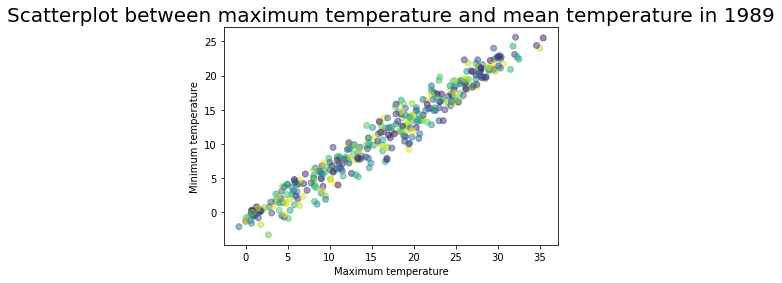

In [7]:
year=1989

data1=data_maxtemperature.loc[data_maxtemperature['Year']==year]
data2=data_temperature.loc[data_temperature['Year']==year]
    
colors = np.random.rand(365)
plt.scatter(data1['TX'], data2['TG'], c=colors, alpha=0.5)
plt.title(f"Scatterplot between maximum temperature and mean temperature in {year}" , fontsize=20)
plt.xlabel('Maximum temperature')
plt.ylabel('Minimum temperature')
plt.show()


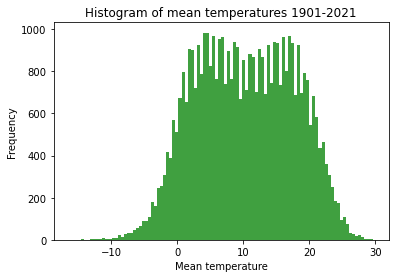

In [8]:
plt.hist(data_temperature['TG'], 100, facecolor='g', alpha=0.75)
plt.xlabel('Mean temperature')
plt.ylabel('Frequency')
plt.title('Histogram of mean temperatures 1901-2021')
plt.show()

In [9]:
data_cloud = pd.read_table('data/observatoire-geneve/CC_STAID000241.txt', sep = ',',
                                names = ['SOUID','DATE','CC','Q_CC'], skiprows = range(0,20), index_col = 1)

print(data_cloud.head())
data_cloud.drop(data_cloud[ data_cloud['Q_CC'] == 9 ].index, inplace = True)
data_cloud['Year'] = [int(str(d)[:4]) for d in data_cloud.index]
data_cloud['Month'] = [int(str(d)[4:6]) for d in data_cloud.index]
data_cloud['Day'] = [int(str(d)[6:8]) for d in data_cloud.index]
data_cloud['CC']=data_cloud['CC']

#Compute the day of the year for each year
day_of_year = np.array(len(data_cloud['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_cloud.index]
data_cloud['Day_of_year'] = [d.timetuple().tm_yday for d in adate]

print(data_cloud.head())

           SOUID  CC  Q_CC
DATE                      
19010101  105109   7     0
19010102  105109   8     0
19010103  105109   3     0
19010104  105109   5     0
19010105  105109   6     0
           SOUID  CC  Q_CC  Year  Month  Day  Day_of_year
DATE                                                     
19010101  105109   7     0  1901      1    1            1
19010102  105109   8     0  1901      1    2            2
19010103  105109   3     0  1901      1    3            3
19010104  105109   5     0  1901      1    4            4
19010105  105109   6     0  1901      1    5            5


In [10]:
data_humidity = pd.read_table('data/observatoire-geneve/HU_STAID000241.txt', sep = ',',
                                names = ['SOUID','DATE','HU','Q_HU'], skiprows = range(0,20), index_col = 1)

print(data_humidity.head())
data_humidity.drop(data_humidity[ data_humidity['Q_HU'] == 9 ].index, inplace = True)
data_humidity['Year'] = [int(str(d)[:4]) for d in data_humidity.index]
data_humidity['Month'] = [int(str(d)[4:6]) for d in data_humidity.index]
data_humidity['Day'] = [int(str(d)[6:8]) for d in data_humidity.index]
data_humidity['HU']=data_humidity['HU']

#Compute the day of the year for each year
day_of_year = np.array(len(data_humidity['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_humidity.index]
data_humidity['Day_of_year'] = [d.timetuple().tm_yday for d in adate]

print(data_humidity.head())

           SOUID  HU  Q_HU
DATE                      
19010101  105111  77     0
19010102  105111  84     0
19010103  105111  72     0
19010104  105111  85     0
19010105  105111  89     0
           SOUID  HU  Q_HU  Year  Month  Day  Day_of_year
DATE                                                     
19010101  105111  77     0  1901      1    1            1
19010102  105111  84     0  1901      1    2            2
19010103  105111  72     0  1901      1    3            3
19010104  105111  85     0  1901      1    4            4
19010105  105111  89     0  1901      1    5            5


In [11]:
data_rainfall = pd.read_table('data/observatoire-geneve/RR_STAID000241.txt', sep = ',',
                                names = ['SOUID','DATE','RR','Q_RR'], skiprows = range(0,20), index_col = 1)

print(data_rainfall.head())
data_rainfall.drop(data_rainfall[ data_rainfall['Q_RR'] == 9 ].index, inplace = True)
data_rainfall['Year'] = [int(str(d)[:4]) for d in data_rainfall.index]
data_rainfall['Month'] = [int(str(d)[4:6]) for d in data_rainfall.index]
data_rainfall['Day'] = [int(str(d)[6:8]) for d in data_rainfall.index]
data_rainfall['RR']=data_rainfall['RR']

#Compute the day of the year for each year
day_of_year = np.array(len(data_rainfall['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_rainfall.index]
data_rainfall['Day_of_year'] = [d.timetuple().tm_yday for d in adate]

print(data_rainfall.head())


           SOUID  RR  Q_RR
DATE                      
19010101  100747   0     0
19010102  100747   0     0
19010103  100747   0     0
19010104  100747   0     0
19010105  100747   0     0
           SOUID  RR  Q_RR  Year  Month  Day  Day_of_year
DATE                                                     
19010101  100747   0     0  1901      1    1            1
19010102  100747   0     0  1901      1    2            2
19010103  100747   0     0  1901      1    3            3
19010104  100747   0     0  1901      1    4            4
19010105  100747   0     0  1901      1    5            5


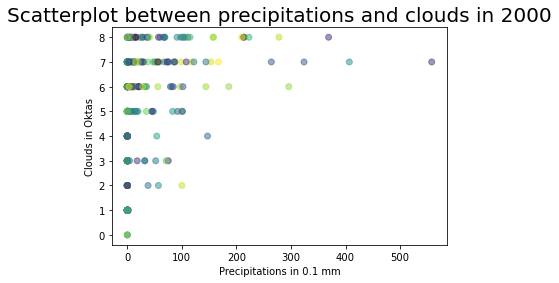

In [12]:
year=2000

data1=data_rainfall.loc[data_rainfall['Year']==year]
data2=data_cloud.loc[data_cloud['Year']==year]
    
colors = np.random.rand(366)
plt.scatter(data1['RR'], data2['CC'], c=colors, alpha=0.5)
plt.title(f"Scatterplot between precipitations and clouds in {year}" , fontsize=20)
plt.xlabel('Precipitations in 0.1 mm')
plt.ylabel('Clouds in Oktas')
plt.show()